In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#Create the dataset based on the given table
x = np.array([[280, 3, 7, 8.9],
              [140, 2, 5, 2.3],
              [225, 2, 6, 7.0],
              [300, 4, 4, 9.2],
              [180, 2, 3, 3.4],
              [195, 2, 5, 5.6],
              [305, 4, 2, 9.4],
              [150, 3, 8, 3.8]])
print(x)

[[280.    3.    7.    8.9]
 [140.    2.    5.    2.3]
 [225.    2.    6.    7. ]
 [300.    4.    4.    9.2]
 [180.    2.    3.    3.4]
 [195.    2.    5.    5.6]
 [305.    4.    2.    9.4]
 [150.    3.    8.    3.8]]


In [3]:
#Separate features (X) from target (y)
X = x[:,:-1]
y = x[:,-1].reshape(-1,1)
print(X)
print(y)

[[280.   3.   7.]
 [140.   2.   5.]
 [225.   2.   6.]
 [300.   4.   4.]
 [180.   2.   3.]
 [195.   2.   5.]
 [305.   4.   2.]
 [150.   3.   8.]]
[[8.9]
 [2.3]
 [7. ]
 [9.2]
 [3.4]
 [5.6]
 [9.4]
 [3.8]]


In [4]:
#Normalize Data
scalerX = StandardScaler()
X2 = scalerX.fit_transform(X)
scalerY = StandardScaler()
y2 = scalerY.fit_transform(y)
print(X2)
print(y2)

[[ 0.93757813  0.30151134  1.06904497]
 [-1.32067457 -0.90453403  0.        ]
 [ 0.05040743 -0.90453403  0.53452248]
 [ 1.26018566  1.50755672 -0.53452248]
 [-0.67545951 -0.90453403 -1.06904497]
 [-0.43350387 -0.90453403  0.        ]
 [ 1.34083754  1.50755672 -1.60356745]
 [-1.15937081  0.30151134  1.60356745]]
[[ 1.01742015]
 [-1.46960689]
 [ 0.30145782]
 [ 1.13046684]
 [-1.05510238]
 [-0.22609337]
 [ 1.20583129]
 [-0.90437347]]


In [19]:
#Fit Linear Regression
model = LinearRegression().fit(X2, y2)
print("Coefficients: \n", model.intercept_, model.coef_)
r_sq = model.score(X2, y2)
print(f"R^2: {r_sq}")

#Generate prediction based on inputs
ypred = model.predict(X2)
MSE = ((y2 - ypred)**2).sum()
print(f"MSE: {MSE}")

Coefficients: 
 [3.05665936e-16] [[ 1.07343058 -0.04043641  0.18214941]]
R^2: 0.9821547395895909
MSE: 0.14276208328327333


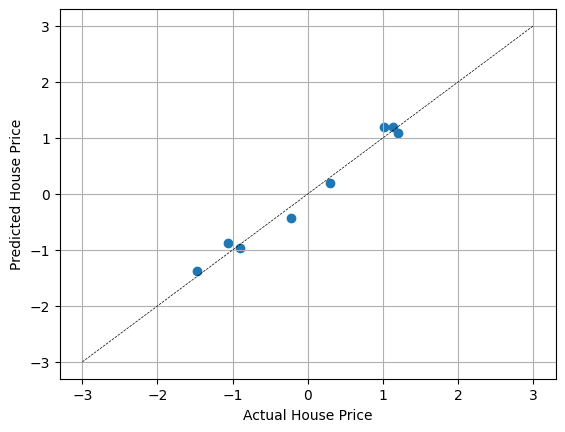

In [15]:
plt.scatter(y2,ypred)
plt.plot(np.array([-3, 3]),np.array([-3, 3]), color='k', linestyle = '--', linewidth = 0.5)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.grid()
plt.show()

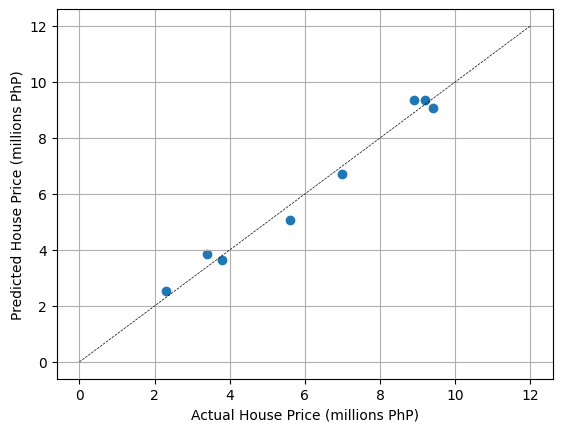

In [17]:
y = scalerY.inverse_transform(y2)
ypred2 = scalerY.inverse_transform(ypred)
plt.scatter(y,ypred2)
plt.plot(np.array([0, 12]),np.array([0, 12]),color='k', linestyle = '--', linewidth = 0.5)
plt.xlabel('Actual House Price (millions PhP)')
plt.ylabel('Predicted House Price (millions PhP)')
plt.grid()
plt.show()

In [18]:
# Get the coefficients and intercept of the scaled model
scaled_intercept = model.intercept_
scaled_coefficients = model.coef_

# Calculate original coefficients
original_coefficients = scaled_coefficients * (scalerY.scale_ / scalerX.scale_)

# Calculate the original intercept
original_intercept = scalerY.mean_ - np.dot(original_coefficients, scalerX.mean_) + scaled_intercept * scalerY.scale_

print("Original Intercept: ", original_intercept)
print("Original Coefficients: ", original_coefficients)

Original Intercept:  [-4.93106243]
Original Coefficients:  [[ 0.04594962 -0.1294195   0.25837897]]


In [23]:
ypred = model.predict(X2)
ypred2 = scalerY.inverse_transform(ypred)
MSE = ((y - ypred2)**2).sum()
print(f"MSE: {MSE}")

MSE: 1.0054019715224514
